In [13]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [14]:
columns=['text_review_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_playstore.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(4000)

,text_review_english,label
0,"['leg', 'uhhh']",positive
1,"['the internet', 'benerin', 'thx']",positive
2,"['fiber', 'optics', 'easy', 'breaking']",positive
3,"['indihome', 'connection', 'ugly', 'really', '...",negative
4,"['tide', 'fast', 'mbps', 'knp', 'skrg', 'mbps']",positive
...,...,...
3995,"['what', 'enter', 'otp', 'ngeclose', 'kerahs',...",negative
3996,"['failed', 'login', 'repeat', 'times']",negative
3997,['network'],negative
3998,"['connect', 'number', 'indihome', 'applied', '...",negative


In [15]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,text_review_english,label,polaritas
0,"['leg', 'uhhh']",positive,1
1,"['the internet', 'benerin', 'thx']",positive,1
2,"['fiber', 'optics', 'easy', 'breaking']",positive,1
3,"['indihome', 'connection', 'ugly', 'really', '...",negative,-1
4,"['tide', 'fast', 'mbps', 'knp', 'skrg', 'mbps']",positive,1
...,...,...,...
87386,"['', 'login', 'most', 'expensive', 'doang']",positive,1
87387,"['', 'star', 'dlu', 'klu', 'signal', 'bonus', ...",positive,1
87388,"['hopefully', 'telkomsel', 'service', 'best', '']",positive,1
87389,"['simple', 'easy', 'type', 'transaction', 'tel...",positive,1


In [16]:
x = np.array(df['text_review_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(87391,)
(87391,)


In [17]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(87391, 39270)


In [18]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (69912,)

 total data test :  (17479,)


In [19]:
print(xtrain.shape)
print(ytrain.shape)

(69912, 39270)
(69912,)


In [20]:
#klasifikasi data (80 : 20)
svc = SVC(kernel = "linear")

#memasukkan data training ke dalam klasifikasi SVM
svc = svc.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = svc.predict(xtest)
predicted

array([ 1,  1, -1, ...,  1,  1,  1], dtype=int64)

In [21]:
print(accuracy_score(ytest, predicted))

0.934092339378683


In [22]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.96      0.86      0.91      6642
           1       0.92      0.98      0.95     10837

    accuracy                           0.93     17479
   macro avg       0.94      0.92      0.93     17479
weighted avg       0.94      0.93      0.93     17479



In [23]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[ 5741,   901],
       [  251, 10586]], dtype=int64)

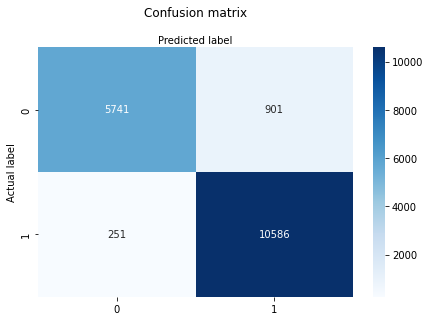

In [24]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()